# Tasks

SQL queries (approx. 30 minutes):
Work with last month of transactions available in the dataset.

**1. List all customers who made more purchases within 1 week from their first purchase.**

**2. Retrieve the top 3 products based on sales quantity.**

In [ ]:
WITH LastMonthSales AS (
    SELECT MAX(d.d_month_seq) AS last_month
    FROM SNOWFLAKE_SAMPLE_DATA.TPCDS_SF10TCL.STORE_SALES AS s
    JOIN SNOWFLAKE_SAMPLE_DATA.TPCDS_SF10TCL.DATE_DIM AS d ON s.ss_sold_date_sk = d.d_date_sk
)
SELECT i.i_item_sk, i.i_item_id, i.i_product_name, SUM(s.ss_quantity) as total_quantity
FROM SNOWFLAKE_SAMPLE_DATA.TPCDS_SF10TCL.STORE_SALES AS s
JOIN SNOWFLAKE_SAMPLE_DATA.TPCDS_SF10TCL.ITEM as i on s.ss_item_sk = i.i_item_sk
JOIN SNOWFLAKE_SAMPLE_DATA.TPCDS_SF10TCL.DATE_DIM AS d ON s.ss_sold_date_sk = d.d_date_sk
JOIN LastMonthSales as lm on d.d_month_seq = lm.last_month
GROUP BY i.i_item_id, i.i_item_sk, i.i_product_name
ORDER BY total_quantity DESC
LIMIT 3

**3. Calculate the total revenue generated from each product category.**

## What I learned from data?

**1. List all customers who made more purchases within 1 week from their first purchase.**
 - Last month when the purchase was done was 1.1.2003-1.2.2003
 - Customers have missing data
 - Customers are spread arround the world


**2. Retrieve the top 3 products based on sales quantity.**
 - The most popular products were (ranked by the quantity order):
   - **barprianticallybarought** with total of: 32934
   - **ationablebarcallyationpri** with total of: 29873
   - **oughtn stbarantiantiought** with total of: 29813
    

**3. Calculate the total revenue generated from each product category.**
 - There is a lot of missing data either category_id or category_name
 - Additional cleaning can be introduced, to divide null values (from category_id) to distribute the values to correct categories (using for example names)
 - It seems that categories **Jewelry, Shoes and Electronics** generate the most revenue. **Note**: *Additional cleaning and grouping may reorder the results*


## Data analysis

**Data analysis (approx. 60 minutes):**
1. Identify trends and patterns:
○ Use the data to generate at least two insights that could help improve sales,
customer retention or analyze product performance, store productivity, etc.

2. Create visualizations to support your findings:
○ Use any tool or library you prefer (e.g., Excel, Python, R, Tableau) to create
visualizations that support your insights.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
customers_purchase = pd.read_csv('first_task/first_task_sql_csv.csv')
product_quantity = pd.read_csv('second_task/second_task_csv.csv')
category_revenue = pd.read_csv('third_task/third_task_csv.csv')

In [3]:
customers_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79430 entries, 0 to 79429
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   C_CUSTOMER_SK    79430 non-null  int64 
 1   C_FIRST_NAME     76718 non-null  object
 2   C_LAST_NAME      76766 non-null  object
 3   C_BIRTH_COUNTRY  76689 non-null  object
 4   C_EMAIL_ADDRESS  76742 non-null  object
 5   C_CUSTOMER_ID    79430 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.6+ MB


In [4]:
customers_purchase

,C_CUSTOMER_SK,C_FIRST_NAME,C_LAST_NAME,C_BIRTH_COUNTRY,C_EMAIL_ADDRESS,C_CUSTOMER_ID
0,30950536,Dean,Shaw,SWITZERLAND,Dean.Shaw@C2go1.com,AAAAAAAAIIEEINBA
1,30950846,Marie,Murphy,ERITREA,Marie.Murphy@dySI6Dz8kDo.edu,AAAAAAAAOLFEINBA
2,30953098,Jesse,Langford,TUVALU,Jesse.Langford@nt7DdcerLJ2XdEu5.com,AAAAAAAAKIOEINBA
3,30953419,Monroe,Smith,ALGERIA,Monroe.Smith@DqJ3t9LnFNjkp.edu,AAAAAAAALMPEINBA
4,30954120,Andrew,Cash,HONG KONG,Andrew.Cash@I5DTPZ.com,AAAAAAAAIICFINBA
...,...,...,...,...,...,...
79425,54330154,Sarah,Rogers,LITHUANIA,Sarah.Rogers@Al.com,AAAAAAAAKCDANDDA
79426,54331524,Martha,Santiago,CAPE VERDE,Martha.Santiago@9pC3UJZhtnJl.com,AAAAAAAAEIIANDDA
79427,54333746,Jeremy,Williams,EGYPT,Jeremy.Williams@zkr6sl1qt.org,AAAAAAAACDBBNDDA
79428,54334054,Gary,Salinas,UZBEKISTAN,Gary.Salinas@Obv.com,AAAAAAAAGGCBNDDA


In [5]:
category_revenue

,I_CATEGORY_ID,I_CATEGORY,TOTAL_REVENUE
0,6.0,Jewelry,1.111827e+10
1,4.0,Shoes,1.111145e+10
2,10.0,Electronics,1.109502e+10
3,5.0,Music,1.106694e+10
4,3.0,Children,1.106145e+10
5,8.0,Sports,1.105197e+10
6,7.0,Home,1.102658e+10
7,2.0,Men,1.094249e+10
8,1.0,Women,1.088763e+10
9,9.0,Books,1.086174e+10


In [6]:
category_map = category_revenue.dropna().set_index('I_CATEGORY')['I_CATEGORY_ID'].to_dict()

In [7]:
category_map

{'Jewelry': 6.0,
 'Shoes': 4.0,
 'Electronics': 10.0,
 'Music': 5.0,
 'Children': 3.0,
 'Sports': 8.0,
 'Home': 7.0,
 'Men': 2.0,
 'Women': 1.0,
 'Books': 9.0}

In [8]:
category_revenue['I_CATEGORY_ID'] = category_revenue.apply(lambda row: category_map.get(row['I_CATEGORY'], row['I_CATEGORY_ID']), axis=1)

In [9]:
category_revenue

,I_CATEGORY_ID,I_CATEGORY,TOTAL_REVENUE
0,6.0,Jewelry,1.111827e+10
1,4.0,Shoes,1.111145e+10
2,10.0,Electronics,1.109502e+10
3,5.0,Music,1.106694e+10
4,3.0,Children,1.106145e+10
5,8.0,Sports,1.105197e+10
6,7.0,Home,1.102658e+10
7,2.0,Men,1.094249e+10
8,1.0,Women,1.088763e+10
9,9.0,Books,1.086174e+10


In [10]:
reverse_map = {v: k for k, v in category_map.items()}
reverse_map

{6.0: 'Jewelry',
 4.0: 'Shoes',
 10.0: 'Electronics',
 5.0: 'Music',
 3.0: 'Children',
 8.0: 'Sports',
 7.0: 'Home',
 2.0: 'Men',
 1.0: 'Women',
 9.0: 'Books'}

In [11]:
category_revenue['I_CATEGORY'] = category_revenue.apply(lambda row: reverse_map.get(row['I_CATEGORY_ID'], row['I_CATEGORY']), axis=1)

In [12]:
category_revenue

,I_CATEGORY_ID,I_CATEGORY,TOTAL_REVENUE
0,6.0,Jewelry,1.111827e+10
1,4.0,Shoes,1.111145e+10
2,10.0,Electronics,1.109502e+10
3,5.0,Music,1.106694e+10
4,3.0,Children,1.106145e+10
5,8.0,Sports,1.105197e+10
6,7.0,Home,1.102658e+10
7,2.0,Men,1.094249e+10
8,1.0,Women,1.088763e+10
9,9.0,Books,1.086174e+10


In [13]:
category_revenue['I_CATEGORY'] = category_revenue['I_CATEGORY'].fillna('Other')

In [14]:
category_revenue['I_CATEGORY_ID'] =  category_revenue['I_CATEGORY_ID'].fillna(0).astype(int)

In [15]:
category_revenue

,I_CATEGORY_ID,I_CATEGORY,TOTAL_REVENUE
0,6,Jewelry,1.111827e+10
1,4,Shoes,1.111145e+10
2,10,Electronics,1.109502e+10
3,5,Music,1.106694e+10
4,3,Children,1.106145e+10
5,8,Sports,1.105197e+10
6,7,Home,1.102658e+10
7,2,Men,1.094249e+10
8,1,Women,1.088763e+10
9,9,Books,1.086174e+10


In [16]:
category = category_revenue.groupby(['I_CATEGORY_ID', 'I_CATEGORY' ], as_index=False).agg({'TOTAL_REVENUE': 'sum'}).sort_values(by='TOTAL_REVENUE', ascending=False)

In [17]:
category

,I_CATEGORY_ID,I_CATEGORY,TOTAL_REVENUE
6,6,Jewelry,1.114423e+10
4,4,Shoes,1.113654e+10
10,10,Electronics,1.112734e+10
5,5,Music,1.109820e+10
3,3,Children,1.108992e+10
8,8,Sports,1.107264e+10
7,7,Home,1.105137e+10
2,2,Men,1.097238e+10
1,1,Women,1.092248e+10
9,9,Books,1.089418e+10


### My assumptions from third task SQL queries are confirmed. After cleaning the dataset the order of products stays the same

Using SQL scripts from previous tasks  I combined table and created data.csv which I would load and perform data analysis

In [18]:
df = pd.read_csv('data/data.csv')

In [19]:
df.rename(columns={'C_CUSTOMER_SK': 'customer_sk', 'C_FIRST_NAME': 'name','C_LAST_NAME': 'surname', 'C_BIRTH_COUNTRY': 'country','C_CUSTOMER_ID': 'customer_id', 
                   'PRODUCT_NAME': 'product_name','PRODUCT_CATEGORY': 'category', 'SS_QUANTITY': 'quantity', 'SS_SALES_PRICE': 'price', 'SS_NET_PROFIT': 'profit'}, inplace=True)

In [20]:
df

,customer_sk,name,surname,country,customer_id,product_name,category,quantity,price,profit
0,22722538,David,Young,HUNGARY,AAAAAAAAKOHLKFBA,Differently long restaurants beat ruthlessly a...,Shoes,4.0,28.97,-30.40
1,15889948,Rosella,Perry,ARMENIA,AAAAAAAAMBGHCPAA,Vague eyebrows know. More darling votes get go...,Books,26.0,100.64,543.59
2,15889948,Rosella,Perry,ARMENIA,AAAAAAAAMBGHCPAA,Direct institutions show immediately tremendou...,Books,3.0,41.49,-174.78
3,22722538,David,Young,HUNGARY,AAAAAAAAKOHLKFBA,Cattle introduce national items. Later living ...,Books,49.0,8.84,-1941.87
4,22722538,David,Young,HUNGARY,AAAAAAAAKOHLKFBA,Un,Men,26.0,17.00,-1484.86
...,...,...,...,...,...,...,...,...,...,...
109746,46802019,Harold,Wong,CROATIA,AAAAAAAADGECKMCA,Local weeks should not prompt eventually fairl...,Women,47.0,153.03,2638.58
109747,46802019,Harold,Wong,CROATIA,AAAAAAAADGECKMCA,Pupils deal in a girls. Wings understand soon ...,Children,8.0,91.96,-26.56
109748,46802019,Harold,Wong,CROATIA,AAAAAAAADGECKMCA,"Presidential, white",Men,1.0,39.11,-57.13
109749,46802019,Harold,Wong,CROATIA,AAAAAAAADGECKMCA,Dominant arrangements achieve names. Societies...,Books,76.0,4.27,-2707.88


In [21]:
def missing_percentage(dataframe):
    for column in dataframe.columns:
        percent_missing = np.mean(dataframe[column].isna()) *100
        print(f'{column} - {percent_missing}%')
missing_percentage(df)

customer_sk - 0.0%
name - 3.6482583302202256%
surname - 2.873777915463185%
country - 4.787200116627639%
customer_id - 0.0%
product_name - 0.20774298184071216%
category - 0.20774298184071216%
quantity - 1.0742498929394722%
price - 0.7972592504851892%
profit - 1.0050022323259014%


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109751 entries, 0 to 109750
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   customer_sk   109751 non-null  int64  
 1   name          105747 non-null  object 
 2   surname       106597 non-null  object 
 3   country       104497 non-null  object 
 4   customer_id   109751 non-null  object 
 5   product_name  109523 non-null  object 
 6   category      109523 non-null  object 
 7   quantity      108572 non-null  float64
 8   price         108876 non-null  float64
 9   profit        108648 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 8.4+ MB


In [23]:
df.describe()

,customer_sk,quantity,price,profit
count,1.097510e+05,108572.000000,108876.000000,108648.000000
mean,3.181617e+07,50.126377,38.186553,-864.314813
std,1.923681e+07,28.786706,34.811243,1784.940631
min,5.331060e+05,1.000000,0.000000,-9137.280000
25%,1.491662e+07,26.000000,9.870000,-1554.290000
50%,3.261172e+07,49.000000,28.670000,-404.890000
75%,4.835233e+07,75.000000,58.030000,1.320000
max,6.496038e+07,100.000000,185.660000,6394.960000


 - **Our data are relatively clean, however I would suggest another data cleaning**

## Data Visualization

### Total revenue

In [24]:
df['total_revenue'] = df['quantity'] * df['price']
category_revenue = df.groupby('category')['total_revenue'].sum().reset_index()

In [25]:
category_revenue = category_revenue.sort_values(by='total_revenue', ascending=False)

In [26]:
print(category_revenue)

      category  total_revenue
3         Home    25239131.32
8       Sports    21717739.60
6        Music    21297845.52
1     Children    21052608.15
2  Electronics    20405975.97
4      Jewelry    20255977.21
5          Men    20138645.21
9        Women    20137273.90
7        Shoes    20118477.70
0        Books    16774081.13


 - **I calculated total_revenue and now I'm going to visualize this Data**
     - First graph will show total revenue by product category for week. Meaning, for customers that purchased another product within a week and I will try to find out in which category they spend the most.
     - Second graph is showing which category generated the most for last month of transactions for all the customers (I'm using cleaned dataframe)

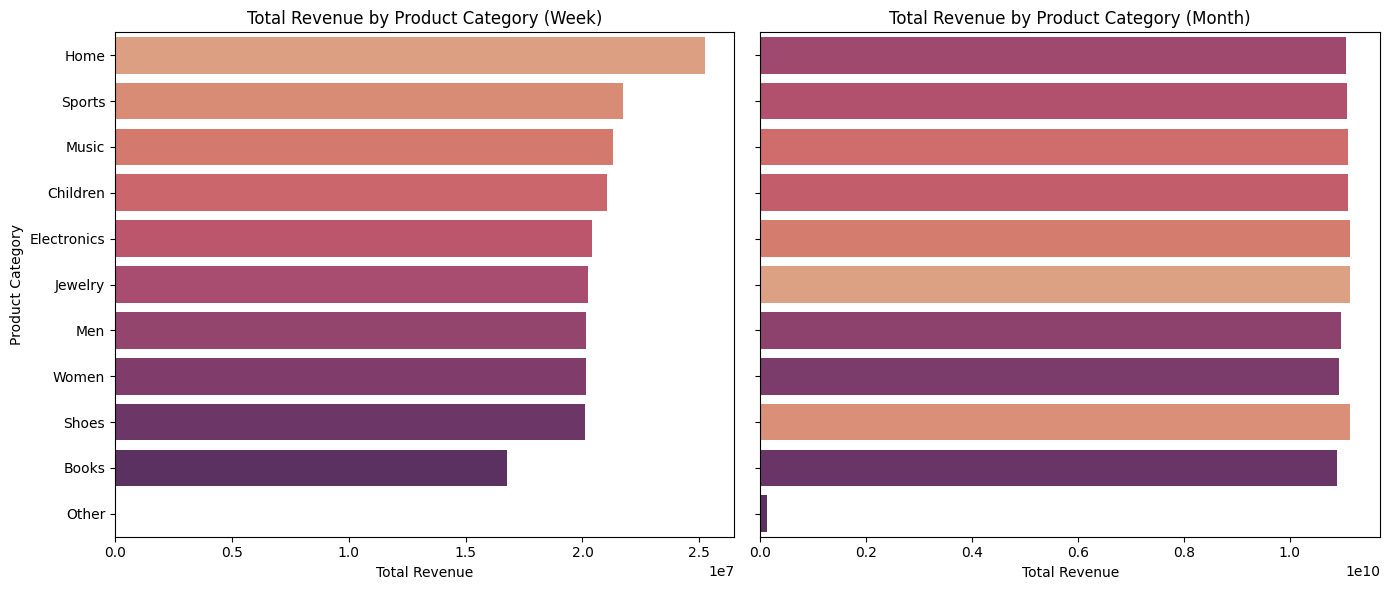

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(data=category_revenue, x='total_revenue', y='category', hue="category", palette="flare", ax=axes[0])
axes[0].set_title('Total Revenue by Product Category (Week)')
axes[0].set_xlabel('Total Revenue')
axes[0].set_ylabel('Product Category')

sns.barplot(data=category, x='TOTAL_REVENUE', y='I_CATEGORY',hue="I_CATEGORY", palette="flare", ax=axes[1])
axes[1].set_title('Total Revenue by Product Category (Month)')
axes[1].set_xlabel('Total Revenue')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

#### A little surprise. Home category is the most popular by returning customers. However Jewelry is all month winner category in total revenue. 
**Note: I suggest to to evaluate graph by the collors, where the brighter color means higher revenue and darker color lower revenue. (Also notice that y axis is different number in total revenue)**

### Top 10 products by Total Profit

In [28]:
product_profit = df.groupby('product_name')['profit'].sum().reset_index()


In [29]:
max_profit_product = product_profit.loc[product_profit['profit'].idxmax()]
print(f"The product with the most profit is '{max_profit_product['product_name']}' with a total profit of {max_profit_product['profit']}.")

The product with the most profit is 'So main stairs justify far new matters. Titles start. Good, simple things used to protec' with a total profit of 243008.48.


 - **Product names are kind of hard to read. I will add category, which is probably more suitable for client(or anyone assessing this) to evaluate**

In [30]:
product_profit = df.groupby(['product_name', 'category'])['profit'].sum().reset_index()

In [31]:
top_10_products = product_profit.sort_values(by='profit', ascending=False).head(10)

In [32]:
top_10_products['product_label'] = top_10_products['product_name'] + ' (' + top_10_products['category'] + ')'

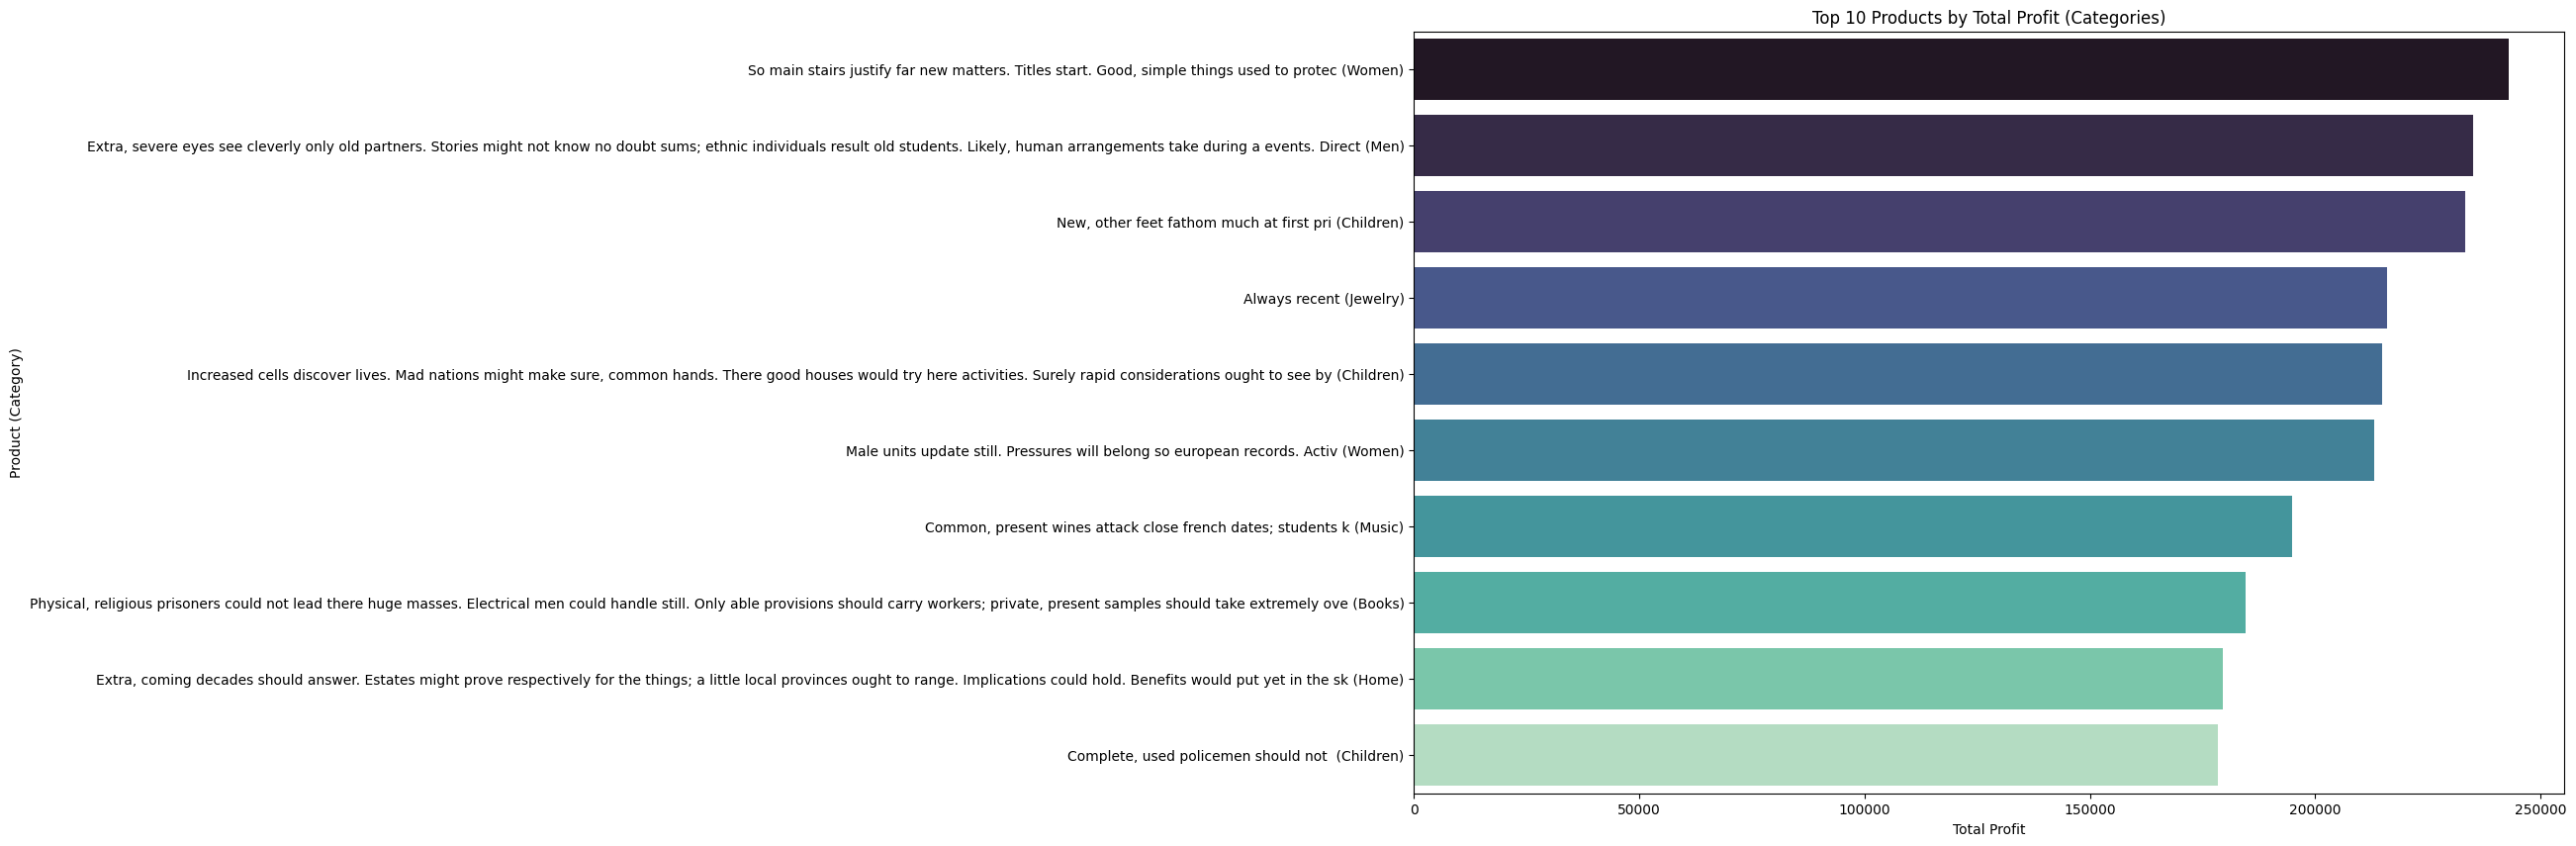

In [33]:
plt.figure(figsize=(15, 10))
sns.barplot(data=top_10_products, x='profit', y='product_label', hue='product_label', palette="mako")
plt.title('Top 10 Products by Total Profit (Categories)')
plt.xlabel('Total Profit')
plt.ylabel('Product (Category)')
plt.show()

#### So most favourite product is from Women category. It seems to be that this category is very profitable last month. It is closely followed by men adn children category
**Note: This can be a good indication for launching a marketing campaing. Probably this category has relation to time, season or events occuring during this period of year**

## AI based solutions

**AI integration (approx. 30 minutes):**
1. Propose a way to use AI to enhance the business:
○ Suggest an AI-based solution, such as a recommendation system for products,
customer segmentation for targeted marketing, or predictive analytics for
inventory management.

2. Outline the steps to implement the proposed AI solution:
○ Describe the approach and outline the steps required to implement your
proposed AI solution.

**Based on data analysis which I had done, I would suggest development of product recommendation system. AI could help to increase the sales and customer satisfaction by recommending products that are actually providing additional value to customers.**

Steps to implement the solution (theorethically):

1. Collect data from web. Mostly user interactions, purchase history, browsing patterns, product reviews and demographic + metada
2. Cleaning the data to remove inconsistencies, duplicates and missing values.
3. Analyze data. Find the patters. How are customers browsing? What are they purchasing? Is there anything influencing their behaviour (seasonality, weather)
4. Identify top products and products with cross sell opportunities
5. Select model and evaluate. How is the model performing? How precisely is model recommending products.
6. Execute A/B testing, model vs simple recommendation of product from similar category. What is performing better?
7. Asses and improve.
   

